# DATA620: Assignment 6

## Homework Team 3: David Simbandumwe, Eric Lehmphul and Lidiia Tronina

### Data

For this project, we will be working with Davis Southern Club Women network dataset obtained from a previously collected data by Davis et al in 1930s. It represent observed attendance of 18 southern women at 14 social events. It's a simple 2-node network.

* [Brief Description](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis)
* [Dataset](http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat)
* [Python code to create dataset](https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html)

The objective of this week's assignment is:

* Load a dataset
* Create basic analysis
* Explore the relationship between (1) the women, and (2) the social events

### Load Required Packages

In [15]:
import networkx as nx
from networkx import algorithms 
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import networkx.algorithms.bipartite as bipartite

### Exploratory Data Analysis

We have two kinds of nodes: women, and events.

In [3]:
# Import data
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]
women

['Evelyn Jefferson',
 'Laura Mandeville',
 'Theresa Anderson',
 'Brenda Rogers',
 'Charlotte McDowd',
 'Frances Anderson',
 'Eleanor Nye',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Verne Sanderson',
 'Myra Liddel',
 'Katherina Rogers',
 'Sylvia Avondale',
 'Nora Fayette',
 'Helen Lloyd',
 'Dorothy Murchison',
 'Olivia Carleton',
 'Flora Price']

In [4]:
clubs

['E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14']

In [5]:
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


### Degree Centrality

In [10]:
womenDegree = nx.degree(G, women, weight='weight') 
clubsDegree = nx.degree(G, clubs)

In [11]:
#womenDegree
deg_w = dict(sorted(dict(womenDegree).items(), key=lambda item: item[1],reverse=True))
deg_w

{'Evelyn Jefferson': 8,
 'Theresa Anderson': 8,
 'Nora Fayette': 8,
 'Laura Mandeville': 7,
 'Brenda Rogers': 7,
 'Sylvia Avondale': 7,
 'Katherina Rogers': 6,
 'Helen Lloyd': 5,
 'Charlotte McDowd': 4,
 'Frances Anderson': 4,
 'Eleanor Nye': 4,
 'Ruth DeSand': 4,
 'Verne Sanderson': 4,
 'Myra Liddel': 4,
 'Pearl Oglethorpe': 3,
 'Dorothy Murchison': 2,
 'Olivia Carleton': 2,
 'Flora Price': 2}

In [8]:
#womenDegree
deg_c = dict(sorted(dict(clubsDegree).items(), key=lambda item: item[1],reverse=True))
deg_c

{'E8': 14,
 'E9': 12,
 'E7': 10,
 'E5': 8,
 'E6': 8,
 'E3': 6,
 'E12': 6,
 'E10': 5,
 'E4': 4,
 'E11': 4,
 'E1': 3,
 'E2': 3,
 'E13': 3,
 'E14': 3}

### Visualize the network

TypeError: 'int' object is not subscriptable

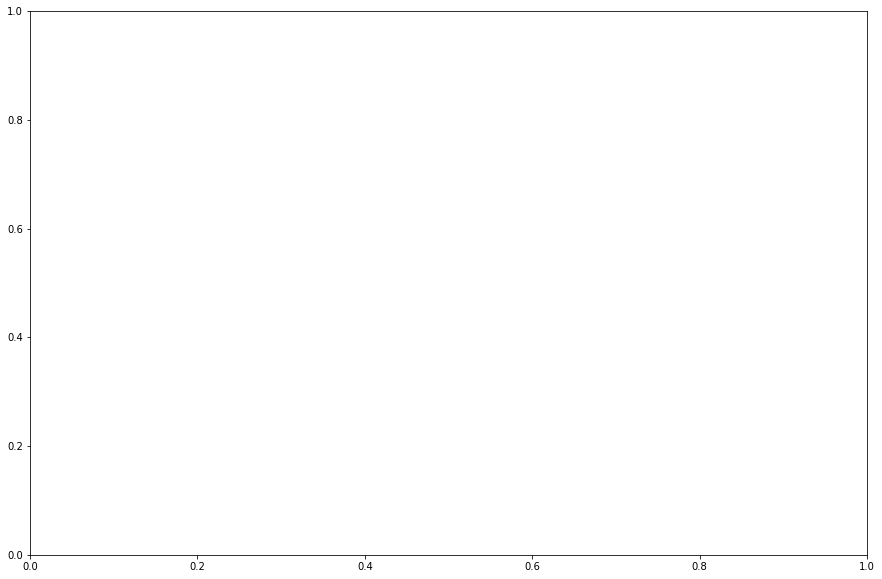

In [36]:
plt.figure(1,figsize=(15,10)) 

nx.draw_networkx_nodes(G,pos,
                       nodelist=women,
                       node_color='#FF66CC',
                       node_size=[v * 100 for v in dict(womenDegree).values()],
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=clubs,
                       node_color='#3399FF',
                       node_size=[v * 200 for v in dict(clubsDegree).values()],
                   alpha=0.8)

# edges
nx.draw(G,pos,with_labels = True, font_size = 11, width=1.0,alpha=0.5)

In [34]:
plt.figure(1,figsize=(15,10)) 

nx.draw_networkx_nodes(G,
                       nodelist=women,
                       node_color='#FF66CC',
                       node_size=[v * 100 for v in dict(womenDegree).values()],
                   alpha=0.8)
nx.draw_networkx_nodes(G,
                       nodelist=clubs,
                       node_color='#3399FF',
                       node_size=[v * 200 for v in dict(clubsDegree).values()],
                   alpha=0.8)

# edges
nx.draw(G,with_labels = True, font_size = 11, width=1.0,alpha=0.5)

TypeError: draw_networkx_nodes() missing 1 required positional argument: 'pos'

# Analysis of Bipartite
* project the bipartite graph on the women node
* calculate measures of centrality (Degrees, Closeness, Betweenness and Eigenvector)

In [16]:
W = bipartite.weighted_projected_graph(G, women)

In [17]:
deg = nx.degree(W, weight='weight')
c = nx.closeness_centrality(W)
b=nx.betweenness_centrality(W)
e = nx.eigenvector_centrality(W, max_iter=100) 

In [18]:
df = pd.DataFrame(women, columns=['name'])

In [19]:
df['Degree'] = df['name'].map(dict(deg))
df['Closeness'] = df['name'].map(dict(c))
df['Betweenness'] = df['name'].map(dict(b))
df['Eigenvector'] = df['name'].map(dict(e))
df.round(decimals=4)

,name,Degree,Closeness,Betweenness,Eigenvector
0,Evelyn Jefferson,50,1.0000,0.0101,0.2535
1,Laura Mandeville,45,0.8947,0.0027,0.2310
2,Theresa Anderson,57,1.0000,0.0101,0.2535
3,Brenda Rogers,46,0.8947,0.0027,0.2310
4,Charlotte McDowd,24,0.7391,0.0000,0.1725
5,Frances Anderson,32,0.8947,0.0027,0.2310
6,Eleanor Nye,36,0.8947,0.0027,0.2310
7,Pearl Oglethorpe,31,0.9444,0.0053,0.2432
8,Ruth DeSand,40,1.0000,0.0101,0.2535
9,Verne Sanderson,38,1.0000,0.0101,0.2535


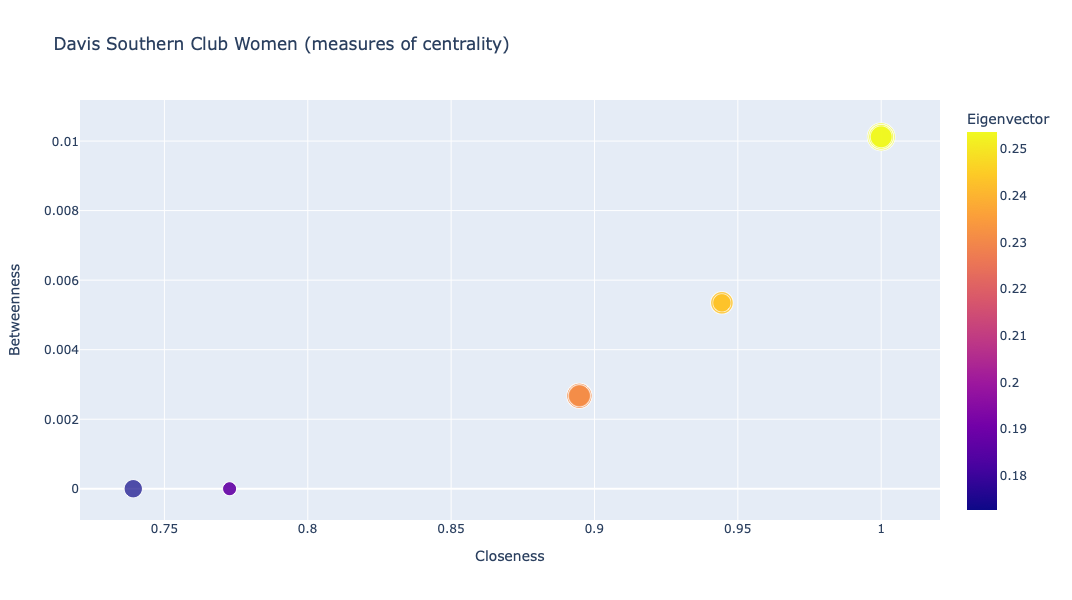

In [22]:
fig = px.scatter(df, x="Closeness", y="Betweenness", size="Degree", color="Eigenvector", 
                    hover_name="name", width=1000, height=600, title="Davis Southern Club Women (measures of centrality)")
fig.show()

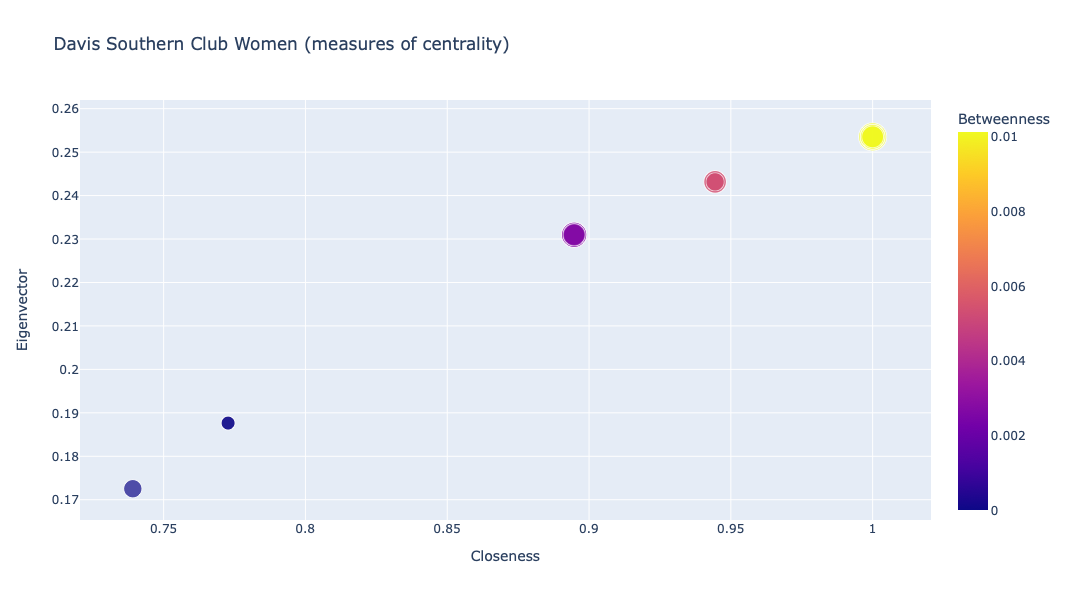

In [23]:
fig = px.scatter(df, x="Closeness", y="Eigenvector", size="Degree", color="Betweenness", 
                    hover_name="name", width=1000, height=600, title="Davis Southern Club Women (measures of centrality)")
fig.show()

# Conclusions
There are several clusters of centrality measures
* The centrality measure can be divided into the following 4 groups (g1 - g4)
* g1 - overall low measures of connectivity and centrality
* g4 - high measures of connectivity and centrality

In [25]:
df_g1 = df[df['Closeness'] < 0.8]
df_g1

,name,Degree,Closeness,Betweenness,Eigenvector
4,Charlotte McDowd,24,0.739130,0.0,0.172527
16,Olivia Carleton,14,0.772727,0.0,0.187639
17,Flora Price,14,0.772727,0.0,0.187639


In [30]:
import numpy as np
df_g2 = df[np.logical_and(df['Closeness'] > 0.8, df['Closeness'] < 0.9)]
df_g2

,name,Degree,Closeness,Betweenness,Eigenvector
1,Laura Mandeville,45,0.894737,0.002674,0.230973
3,Brenda Rogers,46,0.894737,0.002674,0.230973
5,Frances Anderson,32,0.894737,0.002674,0.230973
6,Eleanor Nye,36,0.894737,0.002674,0.230973


In [31]:
df_g3 = df[np.logical_and(df['Closeness'] > 0.9, df['Closeness'] < 0.95)]
df_g3

,name,Degree,Closeness,Betweenness,Eigenvector
7,Pearl Oglethorpe,31,0.944444,0.005348,0.243157
10,Myra Liddel,33,0.944444,0.005348,0.243157
11,Katherina Rogers,37,0.944444,0.005348,0.243157
15,Dorothy Murchison,24,0.944444,0.005348,0.243157


In [32]:
df_g4 = df[np.logical_and(df['Closeness'] > 0.95, df['Closeness'] < 1.2)]
df_g4

,name,Degree,Closeness,Betweenness,Eigenvector
0,Evelyn Jefferson,50,1.0,0.010122,0.253524
2,Theresa Anderson,57,1.0,0.010122,0.253524
8,Ruth DeSand,40,1.0,0.010122,0.253524
9,Verne Sanderson,38,1.0,0.010122,0.253524
12,Sylvia Avondale,46,1.0,0.010122,0.253524
13,Nora Fayette,43,1.0,0.010122,0.253524
14,Helen Lloyd,34,1.0,0.010122,0.253524
